In [1]:

import gensim
import numpy as np
from pathlib import Path
import pickle
from time import time
from typing import List, Dict, Set, Tuple
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import load_iris
import numpy as np
import gensim
import networkx as nx
from node2vec import Node2Vec
from sklearn.decomposition import PCA

from pandas_profiling import ProfileReport


In [43]:
!wget http://recsys.cau.ac.kr:8095/wiki_300_5_word2vec.bin

'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [42]:
modelwo = gensim.models.KeyedVectors.load_word2vec_format(r'wiki_300_5_word2vec.bin',binary=True)


KeyboardInterrupt: 

In [36]:
attrition = 'test.csv'
df_ac = pd.read_csv(attrition,encoding='utf-8')
df_ac

,K,word,S1,S2,S3,S4,S5,S6
0,1,백신패스,vaccine,inoculation,admit,epidemic,force,certification
1,2,위드코로나,normalize,recuperation,coexistence,vaccine,inoculation,infection
2,3,접종완료자,vaccine,inoculation,completion,effect,entry,death
3,4,ウィズコロナ,recuperation,coexistence,vaccine,inoculation,Normalize,state
4,5,段階日常回復,stage,recuperation,daily,state,coexistence,virus
...,...,...,...,...,...,...,...,...
111,112,SBN,senior,artist,work,study,university,brother
112,113,黙トレ,posted,gym,cluster,occurred,early,stages
113,114,ウェビナー,web,seminar,internet,meeting,online,speech
114,115,당모치,every,chicken,right,favorite,food,choice


In [59]:
V=116
a1=list(modelwo[df_ac.loc[df_ac['K']==V]['S1'].values[0]].ravel())
a2=list(modelwo[df_ac.loc[df_ac['K']==V]['S2'].values[0]].ravel())
a3=list(modelwo[df_ac.loc[df_ac['K']==V]['S3'].values[0]].ravel())
a4=list(modelwo[df_ac.loc[df_ac['K']==V]['S4'].values[0]].ravel())
a5=list(modelwo[df_ac.loc[df_ac['K']==V]['S5'].values[0]].ravel())
a6=list(modelwo[df_ac.loc[df_ac['K']==V]['S6'].values[0]].ravel())
df_pc=str(a1)+'|'+str(a2)+'|'+str(a3)+'|'+str(a4)+'|'+str(a5)+'|'+str(a6)
f = open("model_Weight.txt",'w') 
f.write(df_pc)


22532

In [160]:
from pathlib import Path
import pickle
from time import time
from typing import List, Dict, Set, Tuple
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import load_iris
import numpy as np
import gensim
import networkx as nx
from node2vec import Node2Vec
from sklearn.decomposition import PCA

from pandas_profiling import ProfileReport


In [41]:
attrition_data = 'cbd.csv'
df_attrition = pd.read_csv(attrition_data)
target_column = 'word'
selected_columns = ['K', 'S1', 'S2', 'S3', \
                    'S4', 'S5','S6']

df_attrition = df_attrition.loc[:, selected_columns]
df_attrition

,K,S1,S2,S3,S4,S5,S6
0,1,"-0.08547448, -0.29826584, -0.14741431, -0.6706...","-0.2249016, -0.053476267, 0.08432953, -0.04551...","0.20120747, -0.40818706, 0.06754328, -0.208118...","-0.04608272, -0.38059863, -0.3007064, -0.10318...","-0.33770612, -0.12913908, -0.1806995, -0.08245...","0.33793184, -0.41495252, -0.010535245, -0.4272..."
1,2,"0.5636469, -0.18888175, 0.057964522, -0.309588...","-0.2408412, -0.23645157, -0.14024694, 0.156071...","-0.10034606, -0.46013853, -0.16565657, -0.1625...","-0.08547448, -0.29826584, -0.14741431, -0.6706...","-0.2249016, -0.053476267, 0.08432953, -0.04551...","0.07270025, -0.1588778, 0.12582761, -0.1677677..."
2,3,"-0.08547448, -0.29826584, -0.14741431, -0.6706...","-0.2249016, -0.053476267, 0.08432953, -0.04551...","-0.059532832, -0.0901145, -0.049665194, -0.091...","0.03562126, 0.12509596, 0.14319207, -0.3288557...","0.27164158, 0.13193674, -0.42138663, -0.097306...","0.072927535, -0.5590427, -0.24776436, 0.344729..."
3,4,"-0.2408412, -0.23645157, -0.14024694, 0.156071...","-0.10034606, -0.46013853, -0.16565657, -0.1625...","-0.08547448, -0.29826584, -0.14741431, -0.6706...","-0.2249016, -0.053476267, 0.08432953, -0.04551...","0.5636469, -0.18888175, 0.057964522, -0.309588...","-0.16987483, -0.2249915, -0.29015827, -0.17841..."
4,5,"0.004935925, -0.13656415, -0.23017032, -0.2976...","-0.2408412, -0.23645157, -0.14024694, 0.156071...","-0.062034734, -0.13488984, -0.052092835, -0.16...","-0.16987483, -0.2249915, -0.29015827, -0.17841...","-0.10034606, -0.46013853, -0.16565657, -0.1625...","-0.21884118, -0.2691241, -0.1506517, -0.258438..."
...,...,...,...,...,...,...,...
111,112,"0.34240687, -0.7799633, -0.07325146, 0.1758222...","0.2314727, -0.34008136, -0.29488656, 0.0500874...","-0.012104189, -0.42934826, -0.043598104, -0.16...","-0.093848124, -0.4444801, 0.17228708, -0.05815...","0.050761756, -0.46189064, -0.2532838, -0.24484...","0.28268155, -0.38978544, 0.19297943, -0.105613..."
112,113,"0.3019928, -0.26045924, 0.015733648, 0.2703662...","-0.18584548, -0.1925051, 0.10625949, -0.206512...","0.011111926, -0.12589762, -0.3675967, 0.210303...","-0.11889708, -0.22299579, -0.026865011, 0.0308...","0.09591463, -0.48508278, -0.06891152, 0.276375...","0.1566172, -0.20473818, -0.035458744, -0.19221..."
113,114,"-0.077284046, -0.22232834, 0.08215106, -0.0576...","-0.039106183, -0.6523534, -0.105695486, -0.145...","-0.17606132, -0.23837931, 0.0044720406, -0.160...","-0.0618737, -0.7343093, -0.32571483, -0.132904...","-0.13264681, -0.3496549, 0.3373038, -0.2372643...","-0.17120218, -0.26937917, 0.13105515, -0.21617..."
114,115,"0.09196025, -0.14238328, -0.15650213, 0.016880...","-0.25230637, -0.20939383, 0.1711297, 0.0969001...","0.27576885, 0.044581182, -0.32616004, -0.23116...","0.050242823, -0.49941212, 0.08789326, -0.34341...","-0.1013802, -0.37508678, 0.20165949, -0.107570...","0.31933656, -0.32946482, 0.11305168, -0.188344..."


In [79]:
class GraphLoader:
    def __init__(self):
        self.graph = None
        self.title = None
        
    def build_graph(self, 
                    dataframe: pd.DataFrame, 
                    columns: List, 
                    edge_list: List,
                    verbose: bool = True,
                    title: str = 'Unnamed'):
        self.title = title
        t0 = time()
        self.graph = nx.Graph(name = self.title)

        # Add Nodes to the graph.
        for column in columns:
            self.graph.add_nodes_from(dataframe[column].values, label=column)

        # Add remaining columns as Node attributes. Optional
        remaining = dataframe.columns.difference(columns)
        for node, data in self.graph.nodes(data=True):
            if data["label"] == "K":
                self.graph.nodes[node]["K"] = dataframe.loc[dataframe["K"] == int(node), remaining].squeeze().to_dict()

        # Add Edges.
        for _, row in dataframe.loc[:, columns].iterrows():
            for edge in edge_list:
                self.graph.add_edge(row[edge[0]], row[edge[1]])
        
        if verbose:
            print(f"FINISHED in {np.round(time() - t0, 3)} seconds.")
            print(nx.info(self.graph))
        
        return self.graph

    def draw_graph(self, graph: nx.Graph, node_colors: dict, node: str = None, radius: int = 1) -> None:
        def assign_colors(graph: nx.Graph) -> List:
            # Assign Colors to nodes
            colors = []
            for n, data in graph.nodes(data=True):
                node = data["label"]
                colors.append(node_colors.get(node, "white"))
            return colors

        f = plt.figure(figsize = (20,12), facecolor="darkgray")
        ax = f.add_subplot()

        if not node:    
            plt.title(self.title)
        else:
            plt.title(f"Ego Graph around the node {node}, (radius={radius})")
            graph = nx.ego_graph(graph, node, radius = radius)
        
        colors = assign_colors(graph)
        nx.draw_networkx(graph, node_size = 300, node_color = colors, with_labels = False)
        # Add an empty plot to set custom legends
        from matplotlib.lines import Line2D
        ax.scatter([],[])
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', label='K', markerfacecolor = node_colors['K'], markersize=15),
            Line2D([0], [0], marker='o', color='w', label='S1', markerfacecolor = node_colors['S1'], markersize=10),
            Line2D([0], [0], marker='o', color='w', label='S2', markerfacecolor = node_colors['S2'], markersize=10),
            Line2D([0], [0], marker='o', color='w', label='S3', markerfacecolor = node_colors['S3'], markersize=10),
            Line2D([0], [0], marker='o', color='w', label='S4', markerfacecolor = node_colors['S4'], markersize=10),
            Line2D([0], [0], marker='o', color='w', label='S5', markerfacecolor = node_colors['S5'], markersize=10),
            Line2D([0], [0], marker='o', color='w', label='S6', markerfacecolor = node_colors['S6'], markersize=10),

        ]
        ax.legend(handles=legend_elements, loc='best')
        plt.show()

In [80]:
nodes = selected_columns[:] # Do not select Attrition as a feature node
edges = [("K","S1"),
         ("K","S2"),
         ("K","S3"),
         ("K","S4"),
         ("K","S5"),
         ("K","S6")]

node_colors = { # freestyle, update any color.
    "K": "dodgerblue", 
    "S1":"lightgreen", 
    "S2":"tan", 
    "S3":"salmon",
    "S4":"darkcyan",
    "S5":"lightblue",
    "S6":"yellow"
}

FINISHED in 0.044 seconds.
Graph named 'Multilingual Out of Vocabulary Terms relationship' with 502 nodes and 693 edges


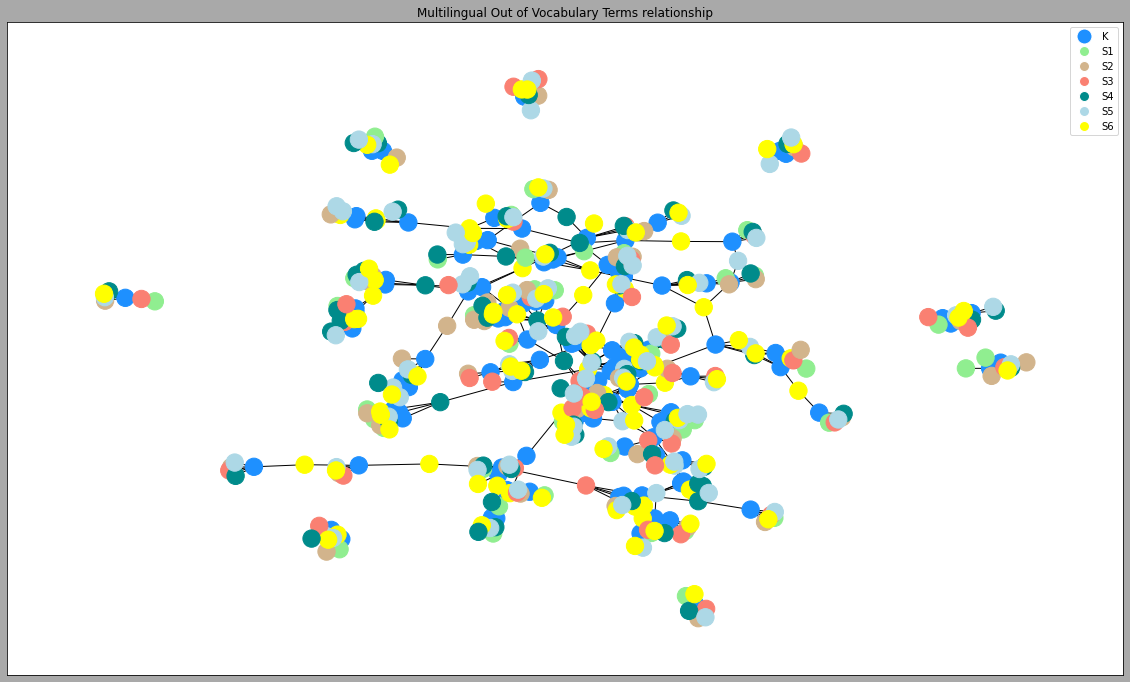

In [82]:
graph_loader = GraphLoader()
demo_graph = graph_loader.build_graph(
            dataframe = df_attrition.loc[:, selected_columns[:]],
            columns = nodes, 
            edge_list = edges,
            verbose = True,
            title = 'Multilingual Out of Vocabulary Terms relationship'
        )
# graph_loader.draw_graph(demo_graph, node_colors, node = 5, radius = 2) # show only the nodes that are at a distance of 2 edges from the employee 5.
graph_loader.draw_graph(demo_graph, node_colors) # Show the whole graph

In [3]:
CWD = Path().cwd()
EMBEDDINGS_DIR = CWD / 'embeddings'
EMBEDDINGS_DIR.mkdir(parents=True, exist_ok=True)
SEED = 12

class VectorizerConfig:
    dimensions = 128
    walk_length = 30
    num_walks = 50
    window = 10
    min_count = 1
    batch_words = 100

class NodeEmbedding:

    def __init__(self) -> None:
        self.vectorizer = None
        self.model = None
        
    def generate_random_walks(self, graph: nx.Graph, **params) -> None:
        self.vectorizer = Node2Vec(graph, **params)
        # return self.vectorizer

    def fit(self, **params) -> gensim.models.Word2Vec:
        if self.vectorizer is None:
            raise Exception("No random walks. Generate Random walks by calling generate_random_walks() method first.")
        self.model = self.vectorizer.fit(**params)
        
        return self.model
    def save_model(self, model: gensim.models.Word2Vec, save_to: Path = EMBEDDINGS_DIR, prefix: str = None) -> None:
        d = VectorizerConfig.dimensions
        w = VectorizerConfig.walk_length
        n = VectorizerConfig.num_walks
        embeddings_filename = f"{prefix}_embeddings_{d}_{w}_{n}.txt"
        model_filename = f"{prefix}_model_{d}_{w}_{n}.pkl"
        # Save only the embeddings in a txt file.
        self.model.wv.save_word2vec_format(str(EMBEDDINGS_DIR/embeddings_filename))
        # Save the entire model.
        self.model.save(str(EMBEDDINGS_DIR/model_filename))
        print(f"Model and embeddings saved to: {str(EMBEDDINGS_DIR/model_filename)}")
    def load_model(self, model_filename: str = None, load_from: Path = EMBEDDINGS_DIR) -> gensim.models.Word2Vec:
        if Path(EMBEDDINGS_DIR / model_filename).exists():
            print("Loaded Model: ", model_filename)
            with Path(EMBEDDINGS_DIR / model_filename).open(mode="r+b") as file:
                self.model = pickle.load(file)
        else:
            raise FileNotFoundError(f"NOT found: {EMBEDDINGS_DIR / model_filename}")
        
        return self.model


In [84]:
import multiprocessing

embedder = NodeEmbedding()

In [85]:
embedder.generate_random_walks(
    demo_graph,
    dimensions = VectorizerConfig.dimensions,
    walk_length = VectorizerConfig.walk_length,
    num_walks = VectorizerConfig.num_walks,
    workers = multiprocessing.cpu_count()
)

Generating walks (CPU: 7): 100%|██████████| 6/6 [00:00<00:00, 19.56it/s]


In [86]:
%%time
model = embedder.fit(
    window = VectorizerConfig.window,
    min_count = VectorizerConfig.min_count,
    batch_words = VectorizerConfig.batch_words
)

CPU times: user 13.7 s, sys: 1.32 s, total: 15 s
Wall time: 4.33 s


In [87]:

embedder.save_model(model, save_to = EMBEDDINGS_DIR, prefix = "K")

Model and embeddings saved to: /Users/gabrielpondc/Documents/dropbox/Dropbox/毕业论文/实验/embeddings/K_model_128_30_50.pkl


In [4]:
import multiprocessing
from pathlib import Path
import pickle
from time import time
from typing import List, Dict, Set, Tuple
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import load_iris
import numpy as np
import gensim
import networkx as nx
from node2vec import Node2Vec
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
attrition = 'test.csv'
df_ac = pd.read_csv(attrition,encoding='utf-8')
embedder = NodeEmbedding()
model2 = embedder.load_model(r"K_model_128_30_50.pkl", load_from = EMBEDDINGS_DIR)

Loaded Model:  K_model_128_30_50.pkl


In [5]:
with open(r'embeddings/K_embeddings_128_30_50.txt', 'r',encoding='UTF-8') as embeddings_file:
    embeddings = embeddings_file.readlines()

In [6]:
embeddings[:1]

['502 128\n']

In [7]:
# This function is requred since embeddings are out of order with the target. They were not matched correctly.
def align_features_and_target(df: pd.DataFrame, embeddings_file: str = None):
    vectors = []
    with Path(EMBEDDINGS_DIR / embeddings_file).open(mode="r",encoding='UTF-8') as file:
        results = file.readlines()
        for person in df["K"].values:
            for line in results[1:]:
                if line.split()[0] == str(person):
                    vectors.append(line.split()[1:])
    
    return np.array(vectors).astype(np.float64)

In [8]:
%%time
target_column = 'word'
selected_columns = ['K', 'S1', 'S2', 'S3', \
                    'S4', 'S5','S6']
attrition_data = 'cbd.csv'
df_attrition = pd.read_csv(attrition_data)
df_attrition = df_attrition.loc[:, selected_columns]
embeddings_filename = r"K_embeddings_128_30_50.txt"
feature_vectors = align_features_and_target(df_attrition, embeddings_file = embeddings_filename)
attrition_data = 'cbd.csv'
df_attrition = pd.read_csv(attrition_data)


Wall time: 1.33 s


In [12]:
df_ac.loc[df_ac['K']==1]['word'].values[0]

'백신패스'

In [39]:
def func(*kargs): return kargs
def rec(S,model):
    print('~'*20)
    s=S
    a=model.wv.similar_by_word(str(s))
    b=[]
    
    for i in range(len(a)):
        try:
            b.append([int(a[i][0]),a[i][1]])
        except ValueError:
            p=1
    c=[]
    for d in range(len(b)):
        c.append(str(df_ac.loc[df_ac['K']==b[d][0]]['word'].values[0]))
    print(str(s)+'.你觉得后面的词是否与'+df_ac.loc[df_ac['K']==s]['word'].values[0]+'有关联'+str(c))

    print('是')
    print('否')
""" +' Similarity:'+str(b[d][1]) """

" +' Similarity:'+str(b[d][1]) "

In [40]:
for i in range(1,117):
    rec(i,model2)



~~~~~~~~~~~~~~~~~~~~
1.你觉得后面的词是否与백신패스有关联['健康码', 'ワクチンパスポト']
是
否
~~~~~~~~~~~~~~~~~~~~
2.你觉得后面的词是否与위드코로나有关联['ウィズコロナ', '段階日常回復']
是
否
~~~~~~~~~~~~~~~~~~~~
3.你觉得后面的词是否与접종완료자有关联['完成接种人员', '백신패스', 'ワクチンパスポト']
是
否
~~~~~~~~~~~~~~~~~~~~
4.你觉得后面的词是否与ウィズコロナ有关联['위드코로나', '段階日常回復']
是
否
~~~~~~~~~~~~~~~~~~~~
5.你觉得后面的词是否与段階日常回復有关联['ウィズコロナ', '위드코로나']
是
否
~~~~~~~~~~~~~~~~~~~~
6.你觉得后面的词是否与ワクチンパスポト有关联['健康码', '백신패스']
是
否
~~~~~~~~~~~~~~~~~~~~
7.你觉得后面的词是否与内卷有关联['노오력']
是
否
~~~~~~~~~~~~~~~~~~~~
8.你觉得后面的词是否与노오력有关联['内卷', '豆腐メンタル']
是
否
~~~~~~~~~~~~~~~~~~~~
9.你觉得后面的词是否与道路族有关联['ヒンナムノー']
是
否
~~~~~~~~~~~~~~~~~~~~
10.你觉得后面的词是否与無策政府有关联['가학방역', '黙トレ']
是
否
~~~~~~~~~~~~~~~~~~~~
11.你觉得后面的词是否与가학방역有关联['無策政府', '팝콘각']
是
否
~~~~~~~~~~~~~~~~~~~~
12.你觉得后面的词是否与原生家庭有关联['親ガチャ']
是
否
~~~~~~~~~~~~~~~~~~~~
13.你觉得后面的词是否与親ガチャ有关联['原生家庭']
是
否
~~~~~~~~~~~~~~~~~~~~
14.你觉得后面的词是否与자택치료有关联['居家', '自宅療養']
是
否
~~~~~~~~~~~~~~~~~~~~
15.你觉得后面的词是否与自宅療養有关联['居家', '자택치료']
是
否
~~~~~~~~~~~~~~~~~~~~
16.你觉得后面的词是否与居家有关联['自宅療養', '자택치료']
是
否
~~~~~~~~~~~~~~~~~~~~
17.

In [164]:
1,2,4,7,11

(1, 2, 4, 7, 11)

In [321]:
model2.wv.distance('1','11')

0.7082757353782654